# Decision Tree & Random Forest Project

For this project, I will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. I will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016). This data is from before they even went public.

I will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. I downloaded the data from [here](https://www.lendingclub.com/info/download-data.action).

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data

** I will use pandas to read the loan_data.csv as a dataframe called loans_df.**

In [2]:
loans_df = pd.read_csv("loan_data.csv")
loans_df.head(3)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0


In [3]:
len(loans_df)

9578

In [4]:
loans_df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [5]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
loans_df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory Data Analysis

Now I will do some data visualization. I will use seaborn and pandas built-in plotting capabilities.

** First, I will create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

In [7]:
df1 = loans_df[loans_df["credit.policy"]==1]
df1

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7705,1,home_improvement,0.1189,663.28,11.012050,2.89,742,3660.000000,6863,46.7,4,0,0,1
7706,1,small_business,0.1739,716.95,11.034890,13.51,697,4350.000000,7574,35.6,3,1,0,1
7707,1,all_other,0.1114,393.65,11.225243,7.82,737,3179.958333,10320,8.9,1,0,0,1
7708,1,home_improvement,0.1379,851.89,11.238489,4.45,717,5249.958333,165,2.5,2,0,0,1


In [8]:
df2 = loans_df[loans_df["credit.policy"] == 0]
df2

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
7710,0,debt_consolidation,0.1608,35.20,10.308953,23.84,642,2490.000000,10125,90.4,1,0,0,0
7711,0,debt_consolidation,0.1608,246.38,12.152144,22.47,647,7212.000000,150971,92.3,4,0,0,1
7712,0,debt_consolidation,0.1600,787.53,11.264464,19.34,682,3780.041667,15897,66.0,5,0,1,0
7713,0,educational,0.1640,126.40,10.308953,29.60,677,1643.000000,3043,58.5,1,0,0,1
7714,0,debt_consolidation,0.1482,242.05,10.714418,19.12,652,2847.000000,26531,52.6,33,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


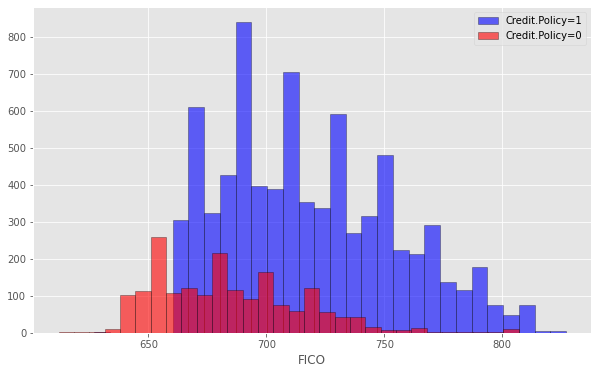

In [9]:
plt.style.use("ggplot")

fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(10,6))

axes.hist(df1["fico"],bins=30,label="Credit.Policy=1",alpha=0.6,color="b",ec="k")
axes.hist(df2["fico"],bins=30,label="Credit.Policy=0",alpha=0.6,color="r",edgecolor="k")

axes.set_xlabel("FICO")
axes.legend(loc=0)

It can be seen that the majority of people in the dataset have a credit policy of 1 (i.e: customer meets the credit underwriting criteria). Also, people who tend to have a lower FICO score have a credit policy of 0. Any person with a FICO score lower than around 660 will automatically not meet the credit underwriting criteria. 

** Now I will create a similar figure, except this time I will select the not.fully.paid column.**

In [10]:
loans_df.head(3)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0


In [11]:
df1 = loans_df[loans_df["not.fully.paid"] == 1]
df1

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
57,1,credit_card,0.1343,678.08,11.884489,10.15,682,4209.958333,41674,74.1,0,0,0,1
65,1,all_other,0.1059,32.55,10.433822,14.47,687,1110.000000,4485,36.9,1,0,0,1
73,1,small_business,0.1501,225.37,12.269047,6.45,677,6240.000000,56411,75.3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [12]:
df0 = loans_df[loans_df["not.fully.paid"] == 0]
df0

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9561,0,all_other,0.0788,115.74,10.999095,10.17,722,4410.000000,11586,61.6,4,0,0,0
9562,0,debt_consolidation,0.1348,508.87,10.933107,17.76,717,3870.041667,8760,28.2,6,0,0,0
9564,0,all_other,0.1385,511.56,12.323856,12.33,687,6420.041667,385489,51.2,4,0,0,0
9567,0,all_other,0.1311,101.24,10.968198,8.23,687,2790.041667,1514,13.8,5,0,0,0


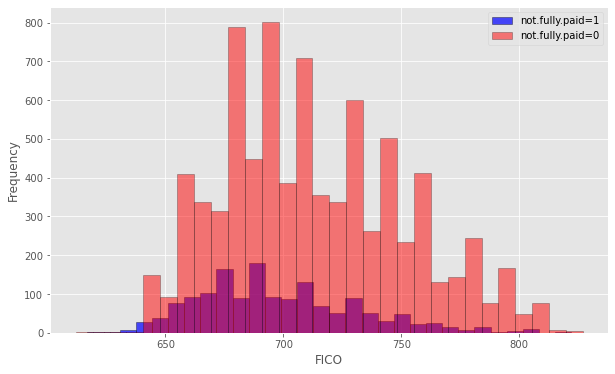

In [13]:
plt.figure(figsize=(10,6))

df1["fico"].plot(kind="hist",bins=30,color="b",alpha=0.7,ec="k",label="not.fully.paid=1")
df0["fico"].plot.hist(bins=30,color="r",alpha=0.5,ec="k",label="not.fully.paid=0")

plt.xlabel("FICO")
plt.legend(loc=0)

It can be seen that the majority of people in the dataset have 0 for not fully paid. Meaning, the majority of people are paying off these loans. Also, there seems to be a similar distribution for not fully paid values of 0 and 1. The plot does not seem to have the same sharp cut-off on FICO score as the previous credit policy plot.
There are sharp spikes but I believe that is due to the way FICO score works. Certain points, will have a larger distribution of likelihood of being a FICO score.

** Now I will create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

<AxesSubplot:xlabel='purpose', ylabel='count'>

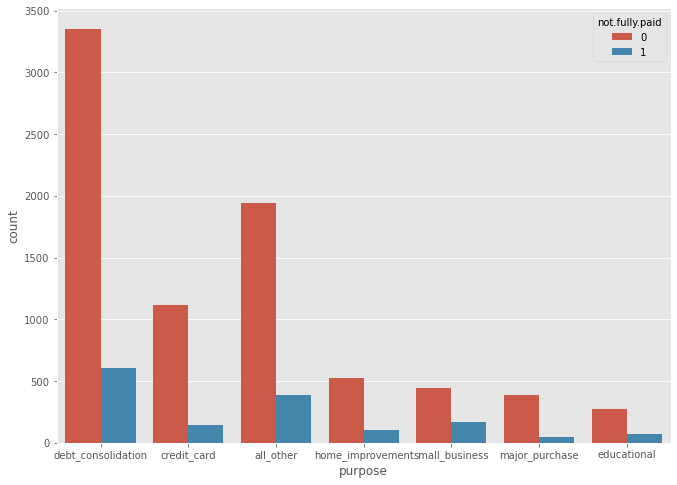

In [14]:
plt.figure(figsize=(11,8))
sns.countplot(x=loans_df["purpose"],hue=loans_df["not.fully.paid"],)

Debt consolidation seeems to be the biggest reason for wanting a loan. Also, it seems that the ratio between fully paid and NOT fully paid is very similar across purpose categories.

** Now I want to analyze the trend between FICO score and interest rate. For this, I will use a jointplot.**

In [15]:
loans_df.head(3)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0


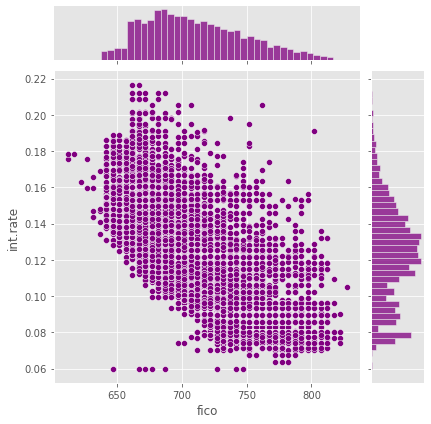

In [16]:
sns.jointplot(x="fico",y="int.rate",data=loans_df,color="purple")

It can be seen that as the FICO score increases the interest rate decreases. This makes sense since a good credit score will generally result in lower loan interest rates.

** Now I will create linear model plots to see if the trend differed between not.fully.paid and credit.policy. **

In [17]:
loans_df.head(3)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0


<Figure size 864x576 with 0 Axes>

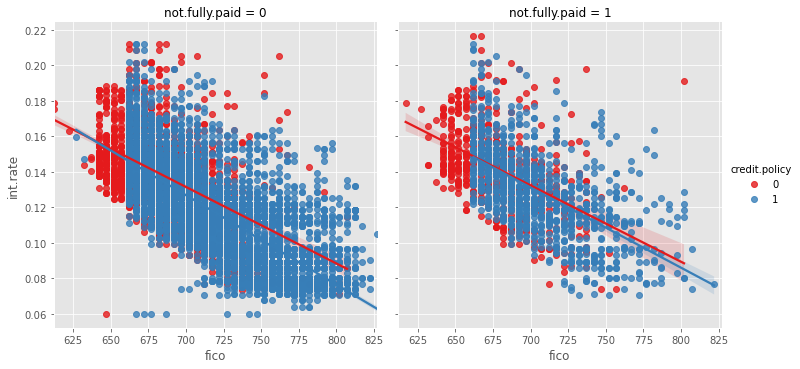

In [18]:
plt.figure(figsize=(12,8))
sns.lmplot(x="fico",y="int.rate",data=loans_df,col="not.fully.paid",palette="Set1",hue="credit.policy")

The plot on the left is the same plot that I created above. But, it now has a linear model line going across it.
From both linear model plots, the behaviours seems to be relatively the same whether or not the loan was fully paid back and irrespective if customers were denied a credit policy or not. 

# Setting up the Data

In [19]:
loans_df.head(3)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0


In [20]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

The dataframe contains 13 numerical and 1 object column.
I will transform the "purpose" column as categorical using dummy variables.

In [21]:
final_data = pd.get_dummies(data=loans_df,columns=["purpose"],drop_first=True)
final_data

# Drop first to avoid multicollinearity issues.

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [22]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

## Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = final_data.drop(labels="not.fully.paid",axis=1)
X

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,0,0,0,1,0,0


In [25]:
y = final_data["not.fully.paid"]
y

0       0
1       0
2       0
3       0
4       0
       ..
9573    1
9574    1
9575    1
9576    1
9577    1
Name: not.fully.paid, Length: 9578, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [27]:
X_train

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
554,1,0.0800,156.69,10.370988,10.71,762,2309.041667,1698,7.9,0,0,0,0,1,0,0,0,0
4051,1,0.1095,32.72,10.379672,15.43,717,3899.958333,0,0.0,0,0,0,0,0,0,0,0,0
6453,1,0.1114,164.02,11.125349,13.35,722,4650.000000,3768,43.0,0,0,0,0,1,0,0,0,0
8522,0,0.1829,411.99,11.461632,20.48,652,7207.000000,10705,44.6,7,1,1,0,1,0,0,0,0
6589,1,0.1496,817.63,11.695247,8.51,707,5226.041667,255,0.8,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9124,0,0.1221,166.58,11.472103,6.40,707,6450.000000,731,14.6,4,0,0,0,0,0,1,0,0
2827,1,0.1568,328.14,10.596635,14.10,662,2669.958333,4485,25.8,0,2,0,0,0,0,0,0,0
8192,0,0.0920,95.68,10.596635,0.99,707,779.000000,1676,64.5,1,0,0,0,0,0,0,0,0
1474,1,0.1525,869.70,11.813030,15.56,722,11850.000000,95356,58.1,0,0,0,0,0,0,0,0,1


In [28]:
y_train

554     0
4051    0
6453    0
8522    0
6589    0
       ..
9124    1
2827    1
8192    0
1474    0
2785    0
Name: not.fully.paid, Length: 6704, dtype: int64

In [29]:
X_test

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
7301,1,0.1496,242.53,10.043249,17.06,672,1422.000000,9707,46.2,3,0,0,0,1,0,0,0,0
7345,1,0.1533,870.71,11.184421,18.05,702,9540.000000,35998,87.4,0,0,0,0,0,0,0,0,1
2278,1,0.0768,187.15,11.010399,11.58,787,3810.041667,1157,5.2,0,0,0,0,0,0,1,0,0
2818,1,0.1347,379.94,11.710956,14.28,722,5601.958333,0,0.0,1,1,0,0,0,1,0,0,0
3573,1,0.0932,255.58,11.736069,3.35,752,7650.000000,5752,30.3,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5772,1,0.1218,666.00,11.225243,6.96,732,8703.000000,11522,46.1,0,1,0,0,1,0,0,0,0
8555,0,0.1008,164.76,9.615805,11.12,707,6209.958333,9115,37.8,11,0,0,0,1,0,0,0,0
1677,1,0.0938,255.82,10.873110,14.84,782,3900.000000,9589,12.6,0,0,0,0,0,0,1,0,0
7303,1,0.0714,111.39,10.839581,22.38,747,10350.041670,24809,62.5,3,0,0,0,0,0,0,0,0


In [30]:
y_test

7301    0
7345    1
2278    0
2818    1
3573    0
       ..
5772    0
8555    1
1677    0
7303    0
4045    0
Name: not.fully.paid, Length: 2874, dtype: int64

## Decision Tree Model

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dtree = DecisionTreeClassifier()

In [33]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree
For this, I will use the predictions from the test set and create a classification report and a confusion matrix.

In [34]:
pred = dtree.predict(X_test)
pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
print(classification_report(y_test,pred))
print("\n")
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2402
           1       0.21      0.23      0.22       472

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.74      0.73      0.74      2874



[[2003  399]
 [ 365  107]]


It is reported that that the weighted average precision, recall and f1-score is around 73-74%. But, if class "1" is considered, the average drops to around 22%. The results are unsatisfactory. So, I will now be creating a Random Forest model to compare the results.

## Random Forest model

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rfc = RandomForestClassifier(n_estimators=600)

In [39]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

## Predictions and Evaluation

In [40]:
rfc_pred = rfc.predict(X_test)
rfc_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Now I will create a classification report from the results.

In [41]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2402
           1       0.45      0.01      0.02       472

    accuracy                           0.84      2874
   macro avg       0.65      0.50      0.47      2874
weighted avg       0.77      0.84      0.76      2874



In [42]:
confusion_matrix(y_test,rfc_pred)

array([[2396,    6],
       [ 467,    5]], dtype=int64)

The weighted averages of precision, recall and f1-score were improved. But, if we look at particular areas, the Decision Tree model did better. For example, the recall for class "1" drastically dropped to 0.01 whereas the Decision tree model scored 0.23. Likewise, the f1-score was only 0.02 (Random Forest) for class "1" versus 0.22 (Decision tree).

At this point, there is no clear answer as to which model performed better since this will vastly depend on which metric we are trying to optimize for and what are the costs associated with this.

Perhaps, the accuracy of the model is not as good due to the number of features.
Now, I will use feature importance to see if this helps improve the model.

In [43]:
from sklearn.ensemble import ExtraTreesClassifier

In [44]:
etc = ExtraTreesClassifier(n_estimators=200)

In [45]:
etc.fit(X_train,y_train)

ExtraTreesClassifier(n_estimators=200)

In [46]:
etc.feature_importances_

array([0.02062561, 0.10338096, 0.10417592, 0.10266885, 0.09804098,
       0.09572022, 0.10022088, 0.10013209, 0.10189829, 0.0735554 ,
       0.02787612, 0.01582506, 0.00708472, 0.01722991, 0.00715207,
       0.00897393, 0.00598763, 0.00945138])

In [47]:
X.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business'],
      dtype='object')

In [48]:
feat_importance = pd.Series(etc.feature_importances_, index=X.columns)
feat_importance

credit.policy                 0.020626
int.rate                      0.103381
installment                   0.104176
log.annual.inc                0.102669
dti                           0.098041
fico                          0.095720
days.with.cr.line             0.100221
revol.bal                     0.100132
revol.util                    0.101898
inq.last.6mths                0.073555
delinq.2yrs                   0.027876
pub.rec                       0.015825
purpose_credit_card           0.007085
purpose_debt_consolidation    0.017230
purpose_educational           0.007152
purpose_home_improvement      0.008974
purpose_major_purchase        0.005988
purpose_small_business        0.009451
dtype: float64

<AxesSubplot:>

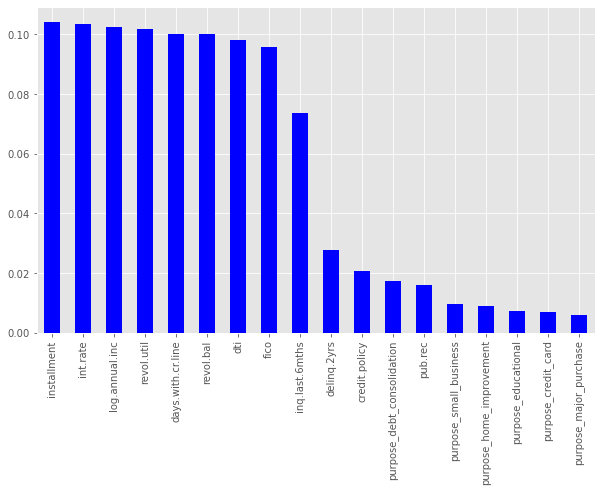

In [49]:
feat_importance.sort_values(ascending=False).plot(kind="bar",figsize=(10,6),color="b")

In [50]:
feat_importance[feat_importance>0.05]

int.rate             0.103381
installment          0.104176
log.annual.inc       0.102669
dti                  0.098041
fico                 0.095720
days.with.cr.line    0.100221
revol.bal            0.100132
revol.util           0.101898
inq.last.6mths       0.073555
dtype: float64

In [51]:
feat_importance[feat_importance>0.05].index

Index(['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico',
       'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths'],
      dtype='object')

In [52]:
fil_feat_imp = [feat for feat in feat_importance[feat_importance>0.05].index]
fil_feat_imp

['int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths']

In [53]:
final_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


Selecting only the 9 best features (based on mean decrease in impurity)

In [54]:
X = final_data[fil_feat_imp]
X

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths
0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0
1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0
2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1
3,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1
4,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0
...,...,...,...,...,...,...,...,...,...
9573,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2
9574,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5
9575,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8
9576,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5


In [55]:
y = final_data["not.fully.paid"]
y

0       0
1       0
2       0
3       0
4       0
       ..
9573    1
9574    1
9575    1
9576    1
9577    1
Name: not.fully.paid, Length: 9578, dtype: int64

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [57]:
X_train

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths
4046,0.0768,109.17,10.968198,15.89,752,15360.000000,17771,37.2,0
3477,0.1221,253.20,11.002100,2.08,727,2820.000000,1763,25.2,1
82,0.0870,88.65,11.695247,15.00,742,3026.000000,8155,14.9,1
9573,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2
5550,0.0894,152.51,11.373663,10.54,732,4140.000000,27901,40.9,1
...,...,...,...,...,...,...,...,...,...
3224,0.1189,663.28,10.781037,10.55,792,5022.000000,53287,0.2,5
9234,0.1774,180.11,10.968129,2.05,687,4949.958333,2401,47.1,9
3571,0.0932,159.74,10.645425,19.31,742,6719.958333,7160,39.3,0
2576,0.1221,333.15,10.941996,19.20,762,5909.958333,2435,13.8,2


In [58]:
y_train

4046    0
3477    0
82      0
9573    1
5550    0
       ..
3224    1
9234    0
3571    0
2576    0
4679    0
Name: not.fully.paid, Length: 6704, dtype: int64

**2nd Random Forest Model**

In [64]:
rfm = RandomForestClassifier(n_estimators=800)

In [65]:
rfm.fit(X_train,y_train)

RandomForestClassifier(n_estimators=800)

In [66]:
pred = rfm.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [67]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2414
           1       0.59      0.02      0.04       460

    accuracy                           0.84      2874
   macro avg       0.72      0.51      0.48      2874
weighted avg       0.80      0.84      0.77      2874



In [68]:
confusion_matrix(y_test,pred)

array([[2407,    7],
       [ 450,   10]], dtype=int64)

Overall, there was a very slight improvement in the weighted averages. But the recall and f1-scores for class "1" did not do great in this case either. This very minor improvement could also be attributed to the fact that, the 2nd Random Forest model (rfm) used 800 trees as opposed to the first model (rfc) which only used 600 trees.